In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from trigger import *
from time import time

In [3]:
n_sample  = 1000
amplitude = np.linspace(10, 200, 20)
x         = 0.148140 * amplitude + 0.000032
poly      = np.linspace(3, 13, 6)
window    = np.linspace(15, 30, 4)
win_len   = np.linspace(20, 70, 6)

### Plot for different moving averages

Total computational time: 82.21812343597412
Total computational time: 61.990036964416504
Total computational time: 54.31953763961792
Total computational time: 54.62278485298157


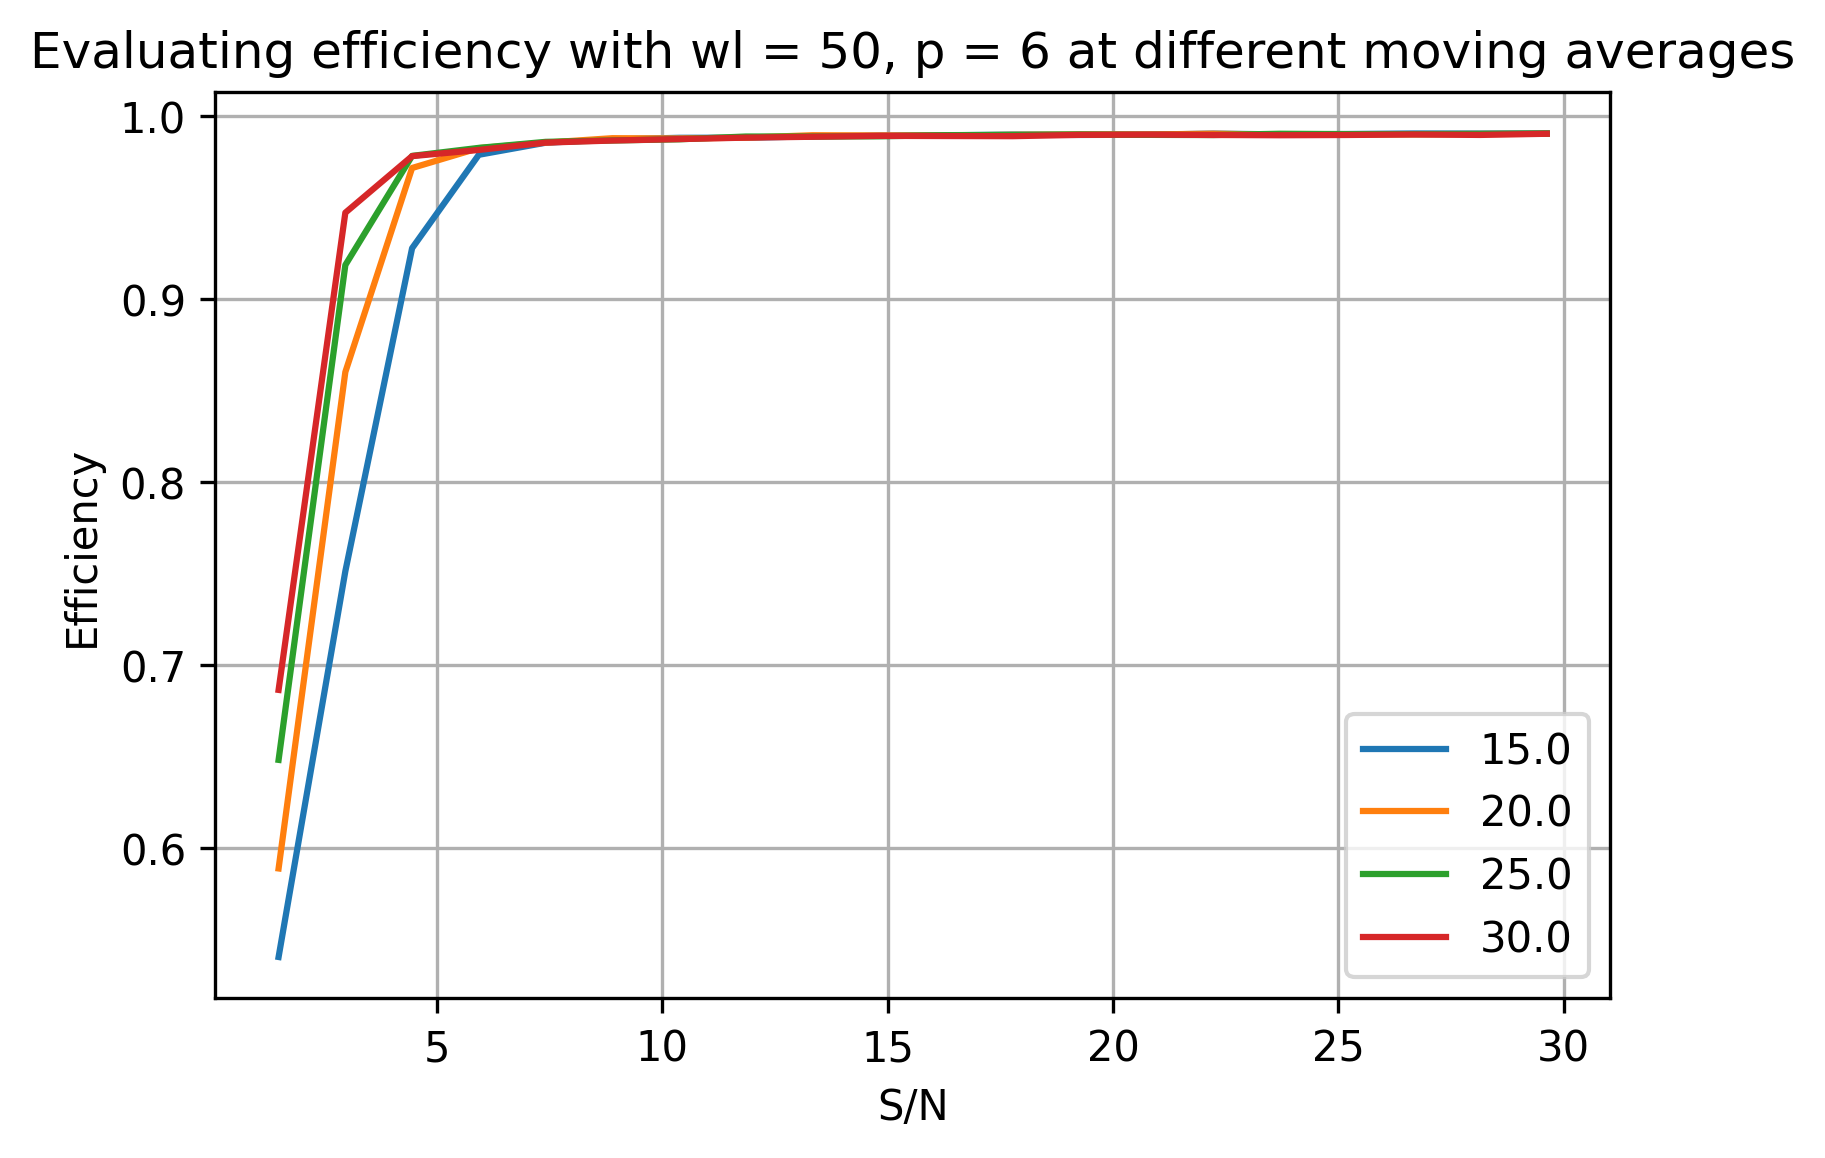

In [5]:
wl = 50
p  = 6

fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')   
for ma in window:
    total_eff = []
    start     = time()
    for amp in amplitude:
        signals    = []
        single_eff = [] 
        for i in range(n_sample):
            signals.append(gen_signal(baseline    = -10, 
                                      amplitude   = amp, 
                                      noise_lev   = 1, 
                                      plot        = False, 
                                      pulse_start = np.random.uniform(199.5,200.5)))

        min = derivative_trigger_matrix2(signals, 
                                         window_ma = int(ma), 
                                         wl        = wl, 
                                         poly      = p, 
                                         mv        = 'convolve', 
                                         vertex    = False, 
                                         plot      = False)
        
        single_eff = efficiency_matrix(min)
        total_eff.append(get_efficiency(single_eff, n_sample))

    print('Total computational time: ' + str(time()-start))
    plt.plot(x, total_eff, label = str(ma))

plt.title('Evaluating efficiency with wl = %d, p = %d at different moving averages' %(wl, p))
plt.legend()
plt.xlabel('S/N')
plt.ylabel('Efficiency')
plt.grid()
plt.show()

### Plot for different window lengths

Total computational time: 37.387768268585205
Total computational time: 30.24658203125
Total computational time: 24.15745711326599
Total computational time: 24.407065629959106
Total computational time: 25.26012134552002
Total computational time: 24.568207025527954


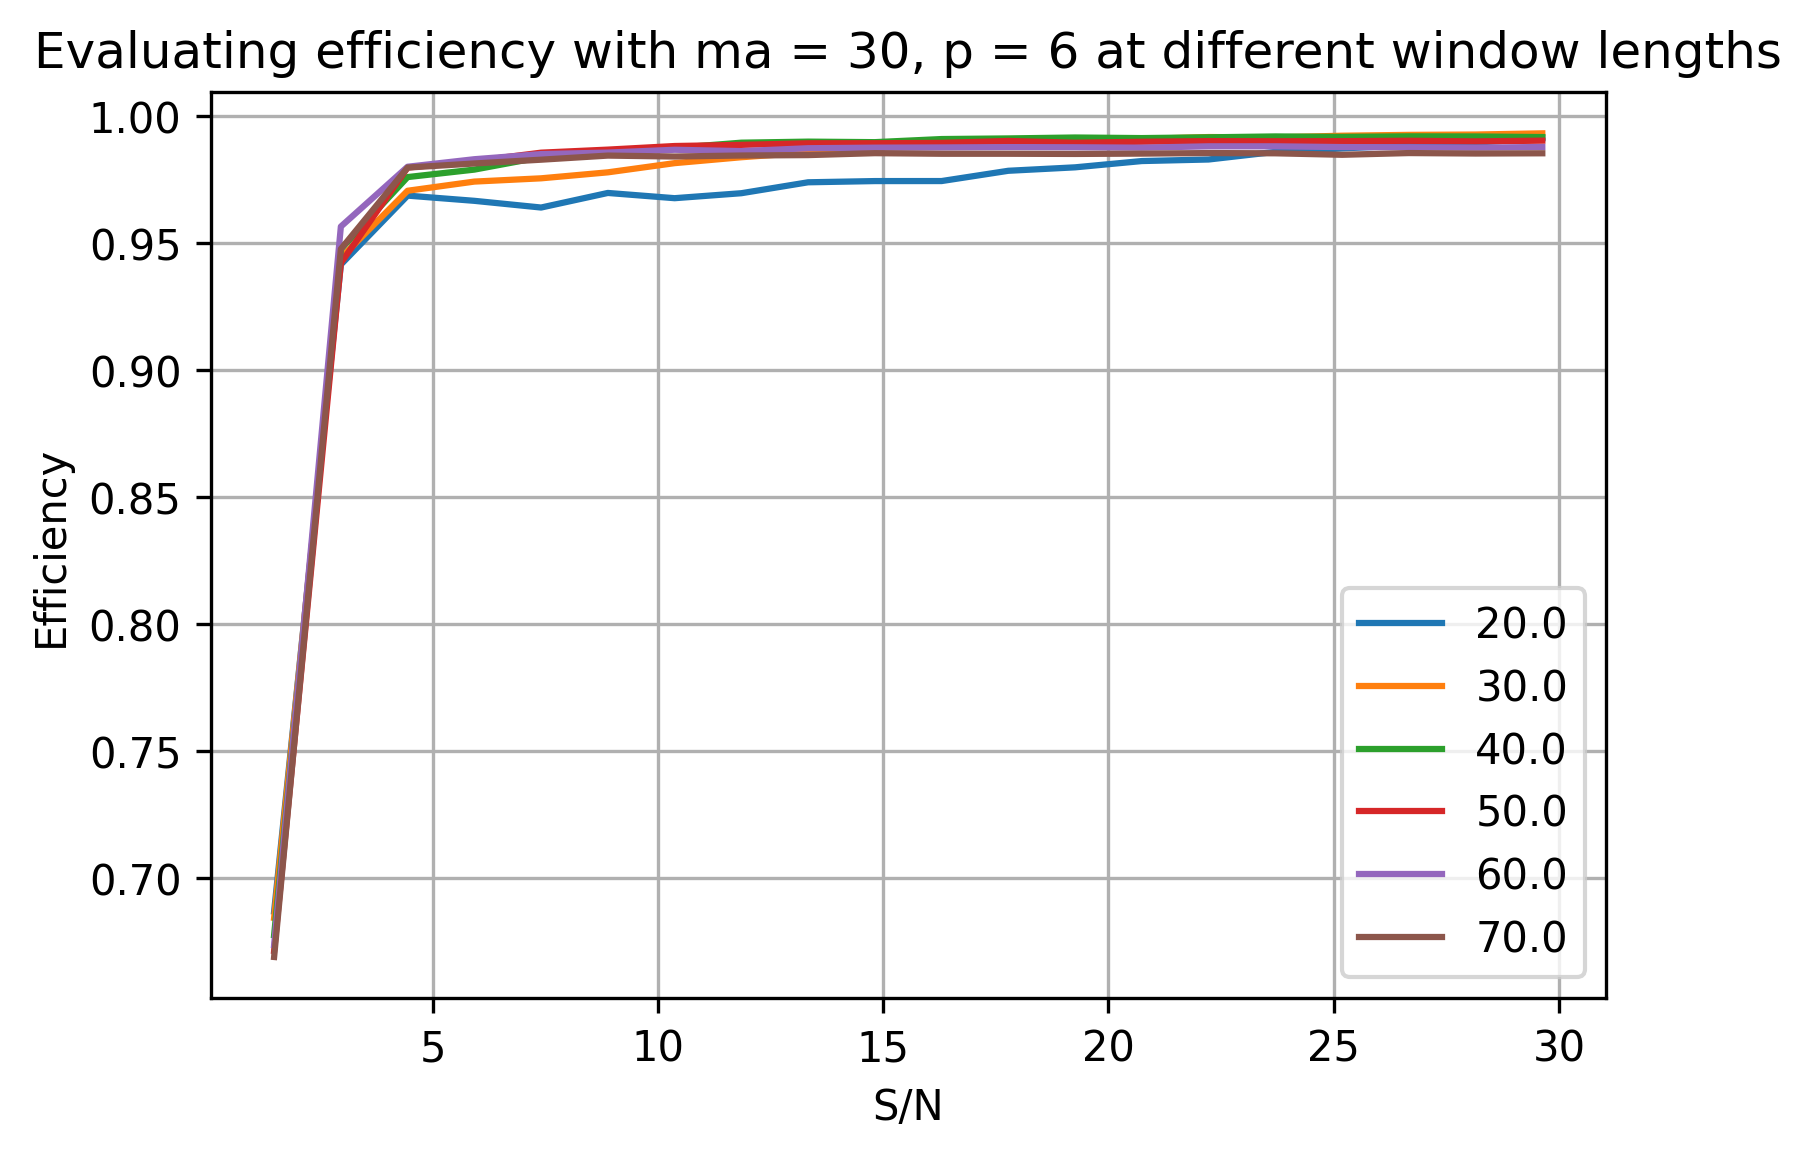

In [7]:
ma = 30
p  = 6

fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')   
for wl in win_len:
    total_eff = []
    start     = time()
    for amp in amplitude:
        signals    = []
        single_eff = [] 
        for i in range(n_sample):
            signals.append(gen_signal(baseline    = -10, 
                                      amplitude   = amp, 
                                      noise_lev   = 1, 
                                      plot        = False, 
                                      pulse_start = np.random.uniform(199.5,200.5)))

        min = derivative_trigger_matrix2(signals, 
                                         window_ma = ma, 
                                         wl        = int(wl), 
                                         poly      = p, 
                                         mv        = 'convolve', 
                                         vertex    = False, 
                                         plot      = False)
        
        single_eff = efficiency_matrix(min)
        total_eff.append(get_efficiency(single_eff, n_sample))

    print('Total computational time: ' + str(time()-start))
    plt.plot(x, total_eff, label = str(wl))

plt.title('Evaluating efficiency with ma = %d, p = %d at different window lengths' %(ma, p))
plt.legend()
plt.xlabel('S/N')
plt.ylabel('Efficiency')
plt.grid()
plt.show()

### Plot for different poly orders

Total computational time: 21.9342999458313
Total computational time: 22.343747854232788
Total computational time: 25.519874811172485
Total computational time: 25.76703143119812
Total computational time: 31.05523419380188
Total computational time: 30.825071334838867


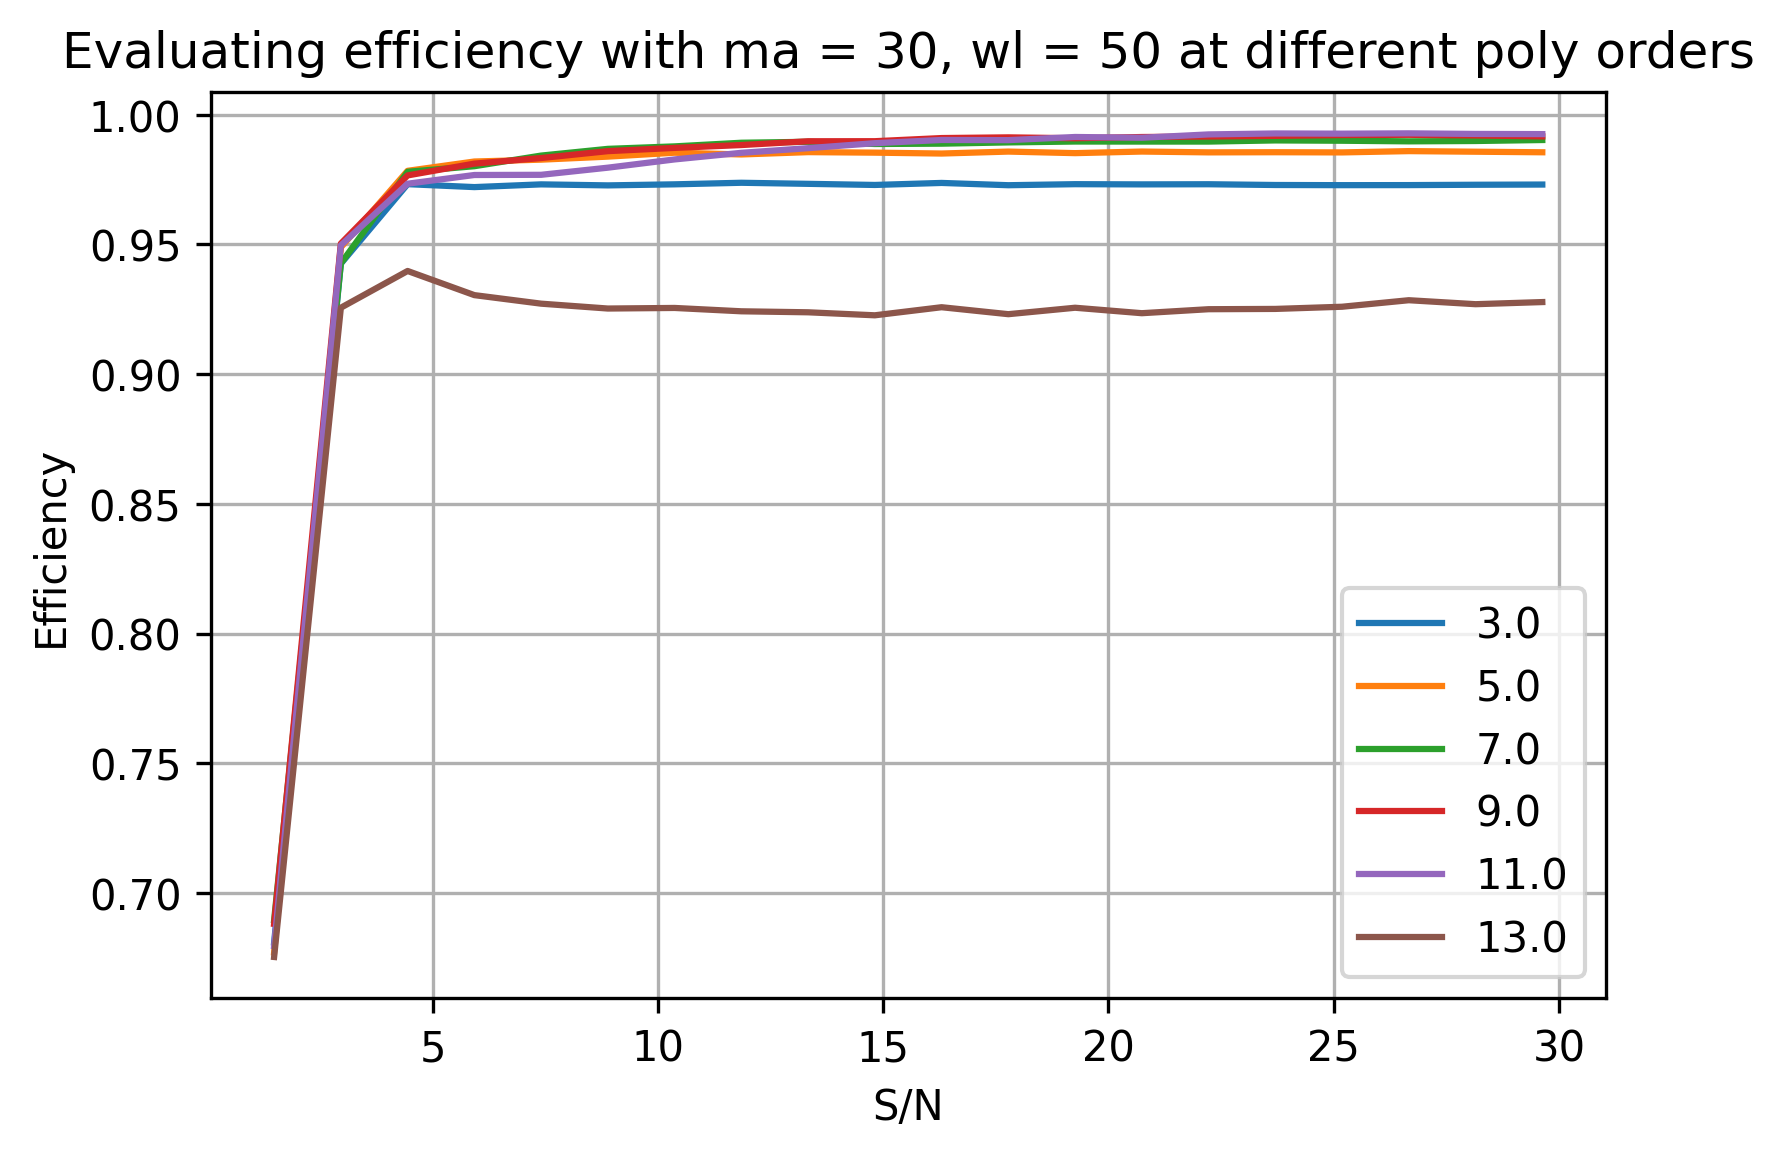

In [8]:
ma = 30
wl = 50

fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')   
for p in poly:
    total_eff = []
    start     = time()
    for amp in amplitude:
        signals    = []
        single_eff = [] 
        for i in range(n_sample):
            signals.append(gen_signal(baseline    = -10, 
                                      amplitude   = amp, 
                                      noise_lev   = 1, 
                                      plot        = False, 
                                      pulse_start = np.random.uniform(199.5,200.5)))

        min = derivative_trigger_matrix2(signals, 
                                         window_ma = ma, 
                                         wl        = wl, 
                                         poly      = int(p), 
                                         mv        = 'convolve', 
                                         vertex    = False, 
                                         plot      = False)
        
        single_eff = efficiency_matrix(min)
        total_eff.append(get_efficiency(single_eff, n_sample))

    print('Total computational time: ' + str(time()-start))
    plt.plot(x, total_eff, label = str(p))

plt.title('Evaluating efficiency with ma = %d, wl = %d at different poly orders' %(ma, wl))
plt.legend()
plt.xlabel('S/N')
plt.ylabel('Efficiency')
plt.grid()
plt.show()

## Efficiency plot whit all the parameters fixed for different moving averages

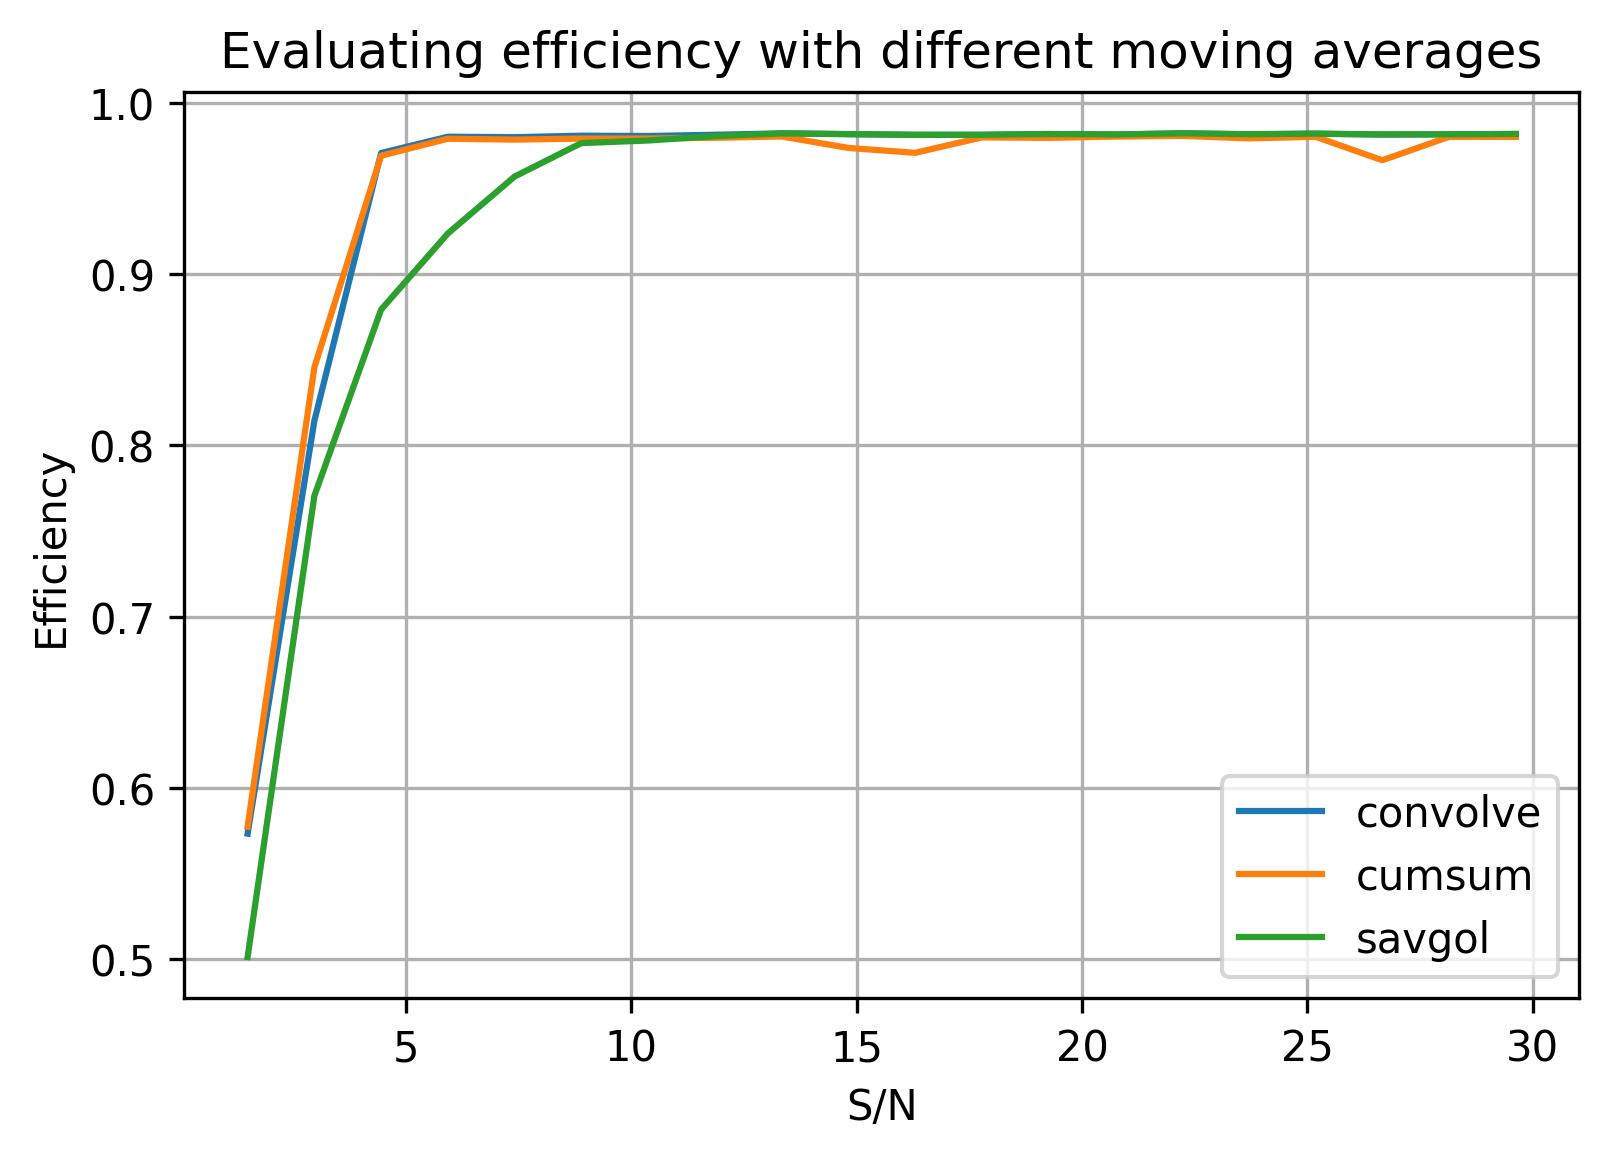

In [10]:
ma = 20
p  = 4
wl = 60

total_eff = []
total_eff2 = []
total_eff3 = []
fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')  
#start = time()
Time = 0
for amp in amplitude:
    signals = []
    single_eff = [] 
    single_eff2 = [] 
    single_eff3 = [] 
    for i in range(n_sample):
        signals.append(gen_signal(baseline    = -10, 
                                    amplitude   = amp, 
                                    noise_lev   = 1, 
                                    plot        = False, 
                                    pulse_start = np.random.uniform(199.5,200.5)))
    mini = derivative_trigger_matrix2(signals, 
                                         window_ma = ma, 
                                         wl        = wl, 
                                         poly      = p, 
                                         mv        = 'convolve', 
                                         vertex    = True, 
                                         plot      = False)
    single_eff = efficiency_matrix(mini)
    total_eff.append(get_efficiency(single_eff, n_sample))

    mini2 = derivative_trigger_matrix2(signals, 
                                         window_ma = ma, 
                                         wl        = wl, 
                                         poly      = p, 
                                         mv        = 'cumsum', 
                                         vertex    = True, 
                                         plot      = False)

    single_eff2 = efficiency_matrix(mini2)
    total_eff2.append(get_efficiency(single_eff2, n_sample))

    mini3 = derivative_trigger_matrix2(signals, 
                                         window_ma = ma, 
                                         wl        = wl, 
                                         poly      = p, 
                                         mv        = 'savgol', 
                                         vertex    = True, 
                                         plot      = False)

    single_eff3 = efficiency_matrix(mini3)
    total_eff3.append(get_efficiency(single_eff3, n_sample))

#print('Total computational time: ' + str(Time))
plt.plot(x, total_eff, label = 'convolve')
plt.plot(x, total_eff2, label = 'cumsum')
plt.plot(x, total_eff3, label = 'savgol')
plt.title('Evaluating efficiency with different moving averages')# ma = %d, p=%d, wl = %d' %(ma, p , wl))
plt.xlabel('S/N')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.show()
#fig.savefig('eff.png', dpi=300)

In [11]:
fig.savefig('eff_tot.png', dpi=300)